In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

### Reading Data

In [32]:
 
df = pd.read_stata("data/5pct_sample_2019_10.dta")

In [33]:
db_date = pd.read_csv("data/db_date.csv")

In [34]:
new_df = df.merge(db_date, on = 'date')

In [35]:
new_df.head()

,date,shop_code,region,price,item,quote_date,obs_panel,obs,date2,date3,...,p_sd,cpiindex00allitems2015100,cpiindex012nonalcoholicbeverages,cpiindex011food2015100,cpiindex02alcoholicbeveragestoba,cpiindex01foodandnonalcoholicbev,cpi00_adjustment,day,day_s,date4
0,323,188,Catalogue collections,52.0,349,201412,101839,111959,01-12-2014,01-12-2014,...,245.27844,100.1,98.9,102.4,98.5,102.0,2.059671,1.0,1.0,2014-12-01
1,323,193,Catalogue collections,130.0,593,201412,101839,111959,01-12-2014,01-12-2014,...,245.27844,100.1,98.9,102.4,98.5,102.0,2.059671,1.0,1.0,2014-12-01
2,323,189,Catalogue collections,52.0,671,201412,101839,111959,01-12-2014,01-12-2014,...,245.27844,100.1,98.9,102.4,98.5,102.0,2.059671,1.0,1.0,2014-12-01
3,323,193,Catalogue collections,80.0,677,201412,101839,111959,01-12-2014,01-12-2014,...,245.27844,100.1,98.9,102.4,98.5,102.0,2.059671,1.0,1.0,2014-12-01
4,323,200,Catalogue collections,399.0,679,201412,101839,111959,01-12-2014,01-12-2014,...,245.27844,100.1,98.9,102.4,98.5,102.0,2.059671,1.0,1.0,2014-12-01


In [36]:
df1 = np.where(new_df['item'] == 250)

In [37]:
df1 = new_df.loc[df1]

In [38]:
ts = df1[['date2','price']]
ts

,date2,price
141,01-12-2014,0.45
696,01-12-2014,0.49
1726,01-12-2014,0.75
1727,01-12-2014,0.99
1728,01-12-2014,0.49
...,...,...
1768950,01-12-1993,0.45
1769795,01-12-1993,0.49
1770287,01-12-1993,0.49
1770684,01-12-1993,0.39


In [39]:
ts.rename(columns={'date2':'date'},inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [40]:
ts['date'] = pd.to_datetime(ts["date"],format="%d-%m-%Y")

C:\Users\ColCelCo\AppData\Local\Temp/ipykernel_27972/2922480741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['date'] = pd.to_datetime(ts["date"],format="%d-%m-%Y")


#### Data Cleaning and Pre-processing

In [41]:
#setting the date column as our new index
ts.set_index("date",inplace = True)

In [42]:
ts_1 = ts.copy()

In [45]:
ts_1.index.duplicated()

array([False,  True,  True, ...,  True,  True,  True])

In [46]:
ts_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4428 entries, 2014-12-01 to 1993-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4428 non-null   float32
dtypes: float32(1)
memory usage: 180.9 KB


In [47]:
ts_1 = ts_1['price'].resample('MS').sum()

In [48]:
ts_1.shape

(379,)

In [50]:
ts_1.head()

date
1988-02-01    7.25
1988-03-01    5.18
1988-04-01    3.93
1988-05-01    4.52
1988-06-01    4.83
Freq: MS, Name: price, dtype: float32

<AxesSubplot:xlabel='date'>

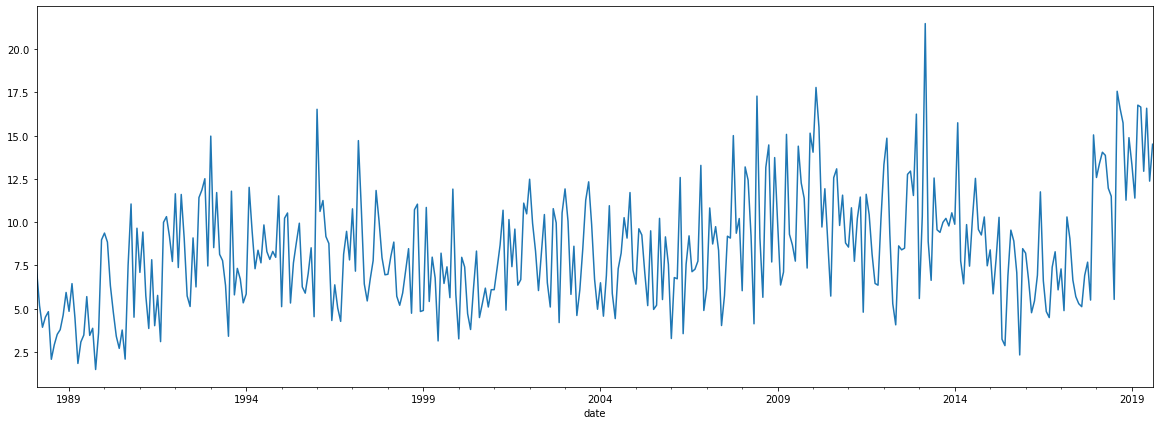

In [52]:
plt.figure(figsize = (20,7))
ts_1.plot()

#### Stationarity check

In [53]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

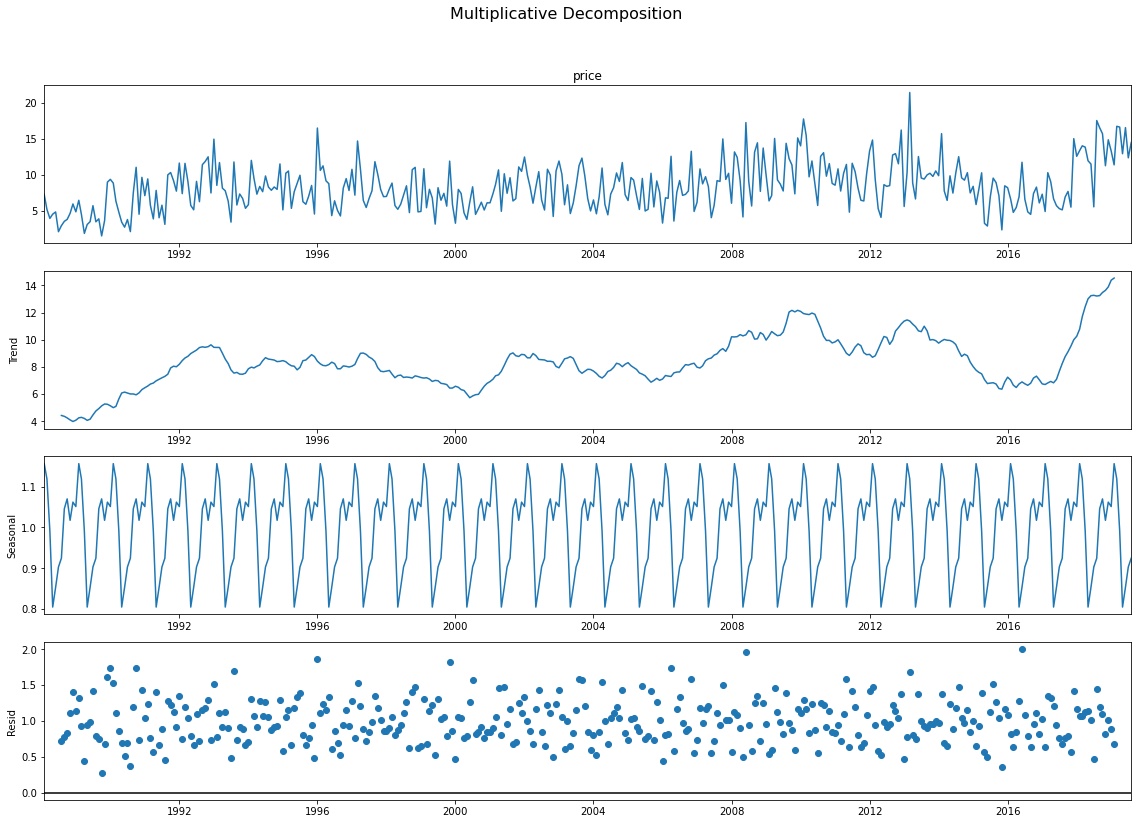

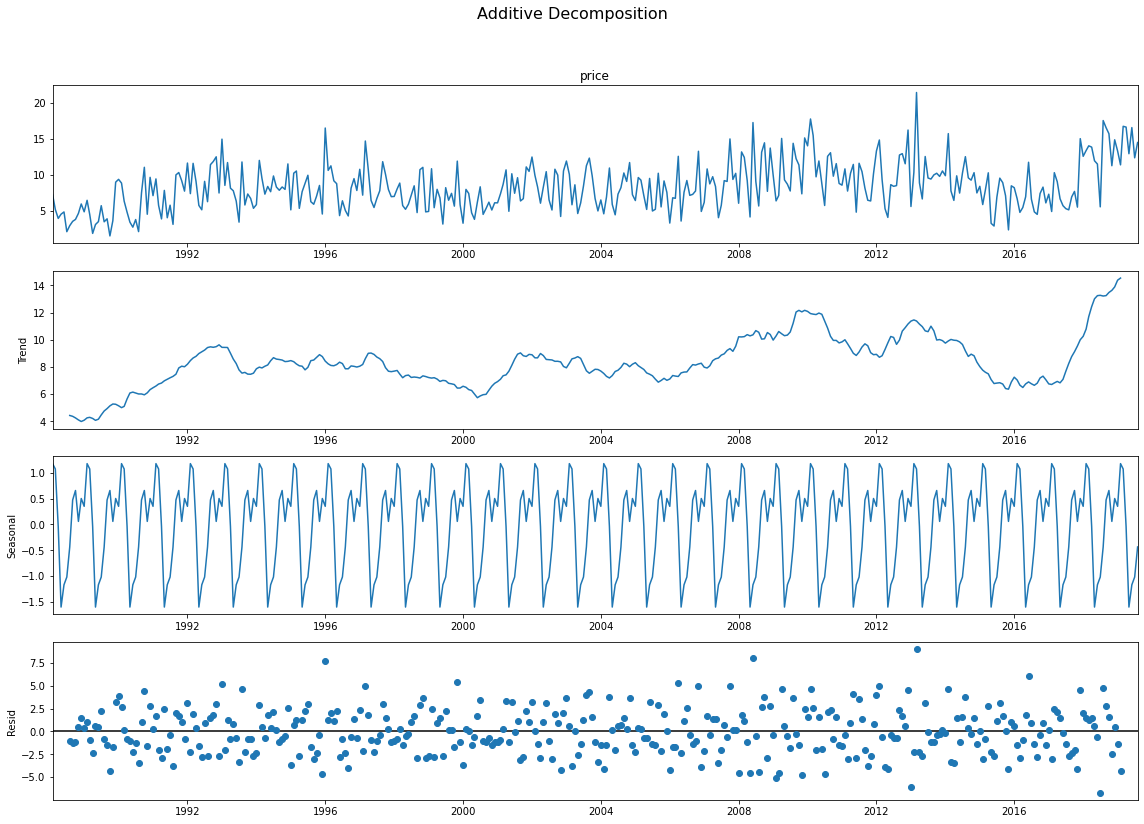

In [55]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(ts_1, model='multiplicative')

# Additive Decomposition
additive_decomposition = seasonal_decompose(ts_1, model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [56]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis.Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [59]:
ts_1 = pd.DataFrame(ts_1)

In [60]:
adf_test(ts_1['price'])

ADF Statistics: -1.9959889515593023
p- value: 0.28833456881103203
weak evidence against null hypothesis,indicating it is non-stationary 


#### Making the series stationery

In [97]:
diff_price = np.diff(ts_1['price'], n=1)

In [98]:
adf_test(diff_price)

ADF Statistics: -7.176878365924915
p- value: 2.7127877995286995e-10
strong evidence against the null hypothesis, reject the null hypothesis.Data is stationary


In [99]:
from statsmodels.graphics.tsaplots import plot_acf 

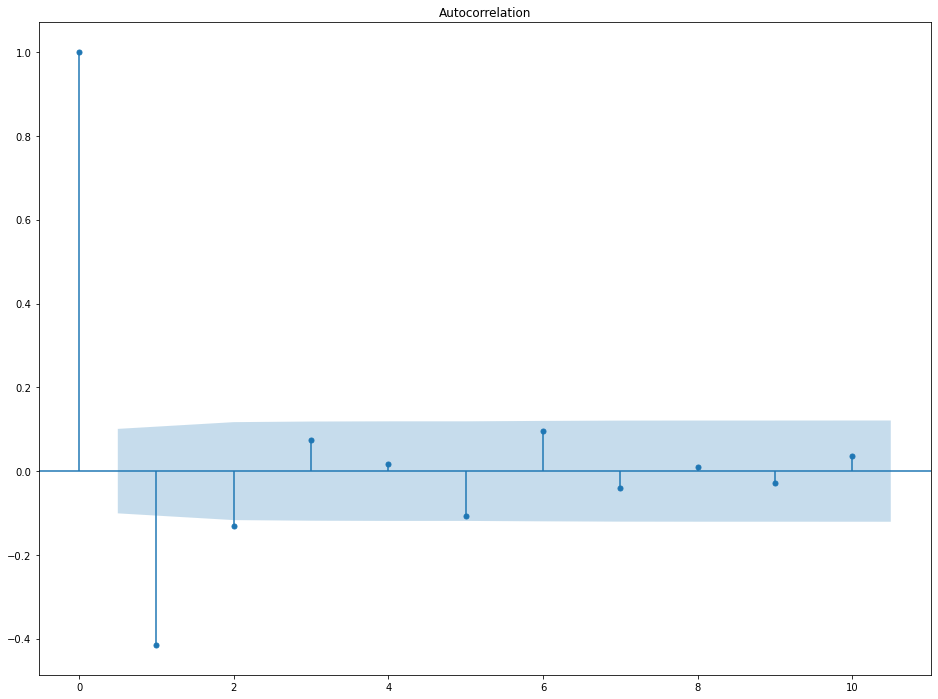

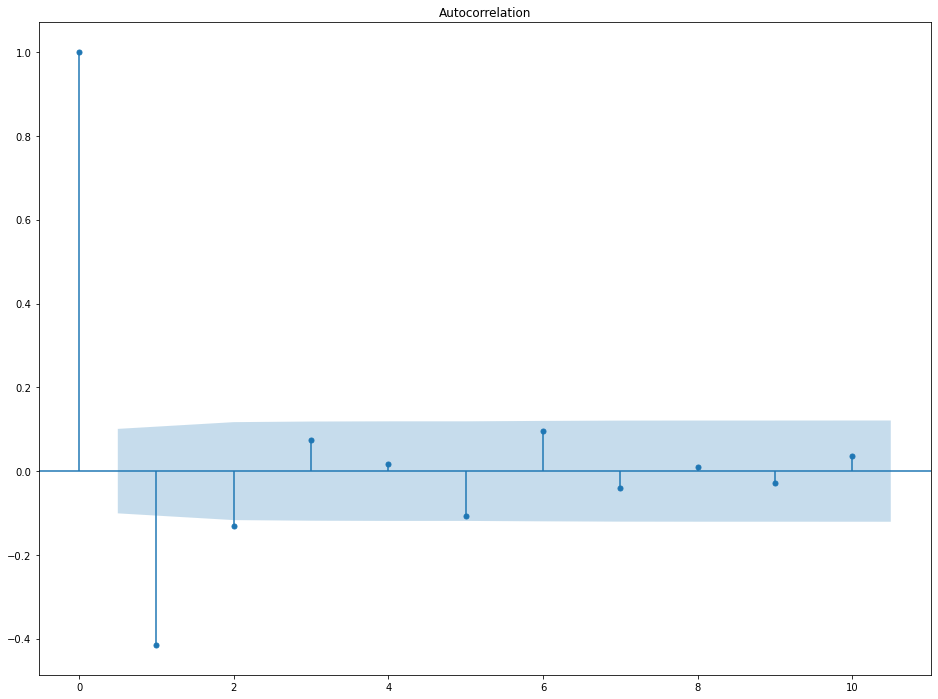

In [100]:
plot_acf(diff_price,lags = 10)

In [101]:
df_diff = pd.DataFrame({'prices_diff': diff_price}) 

<AxesSubplot:xlabel='date'>

<Figure size 360x360 with 0 Axes>

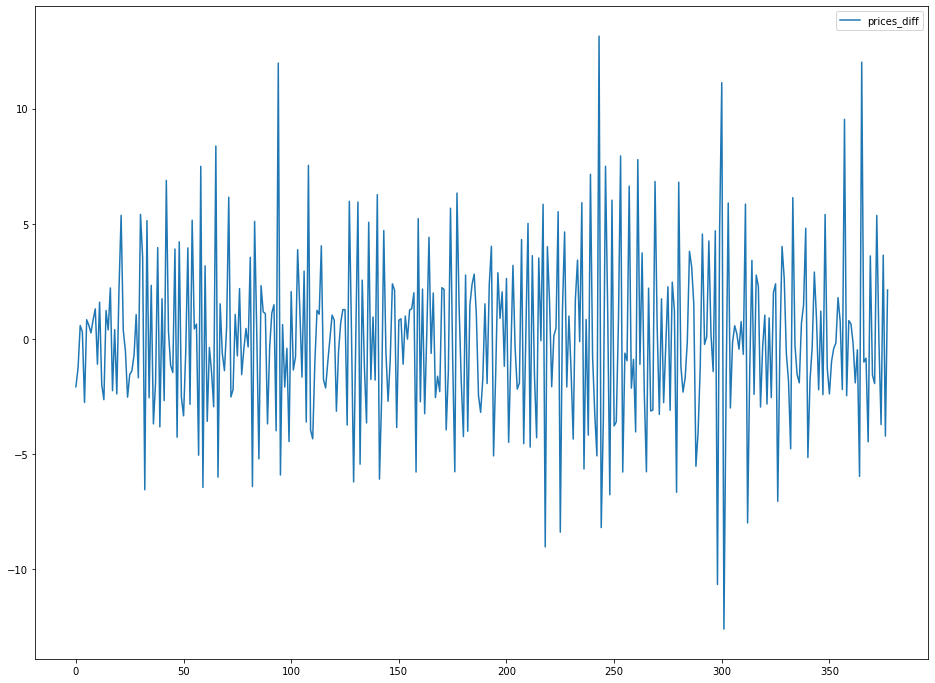

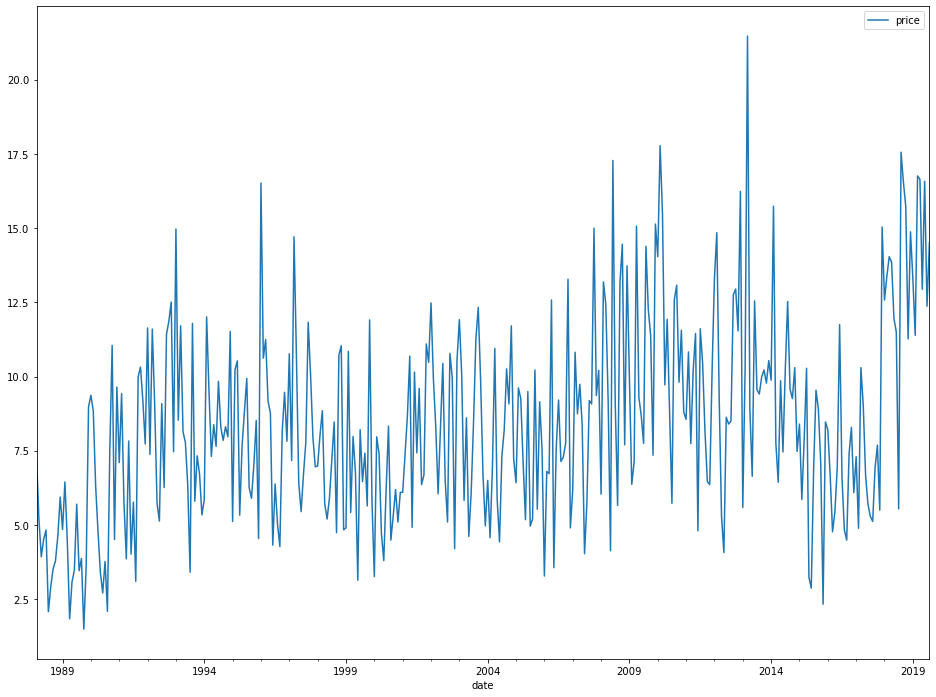

In [166]:
fig = plt.figure(figsize = (5, 5))
df_diff.plot()
ts_1.plot()

### Moving Average Model

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [150]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, 
method: str) -> list: 
 
        total_len = train_len + horizon 

        if method == 'mean': 
            pred_mean = [] 
 
            for i in range(train_len, total_len, window): 
                 mean = np.mean(df[:i].values) 
                 pred_mean.extend(mean for _ in range(window)) 
            return pred_mean 
    
        elif method == 'last': 
            pred_last_value = [] 

            for i in range(train_len, total_len, window): 
                    last_value = df[:i].iloc[-1].values[0] 
                    pred_last_value.extend(last_value for _ in range(window)) 

            return pred_last_value
        
        
        
        elif method == "MA":
        
        
         
                pred_MA = [] 
 
                for i in range(train_len, total_len, window): 
                         model = SARIMAX(df[:i], order=(0,0,2)) #B 
                         res = model.fit(disp=False) 
                         predictions = res.get_prediction(0, i + window - 1) 
                         oos_pred = predictions.predicted_mean.iloc[-window:] #C 
                         pred_MA.extend(oos_pred) 

                return pred_MA
    

In [151]:
train = df_diff[:int(0.8*len(df_diff))] 
test = df_diff[int(0.8*len(df_diff)):] 

In [152]:
pred_df = test.copy() 
TRAIN_LEN = len(train) 
HORIZON = len(test) 
WINDOW = 2 
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean') 
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last') 
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA') 
pred_df['pred_mean'] = pred_mean 
pred_df['pred_last_value'] = pred_last_value 
pred_df['pred_MA'] = pred_MA

<AxesSubplot:>

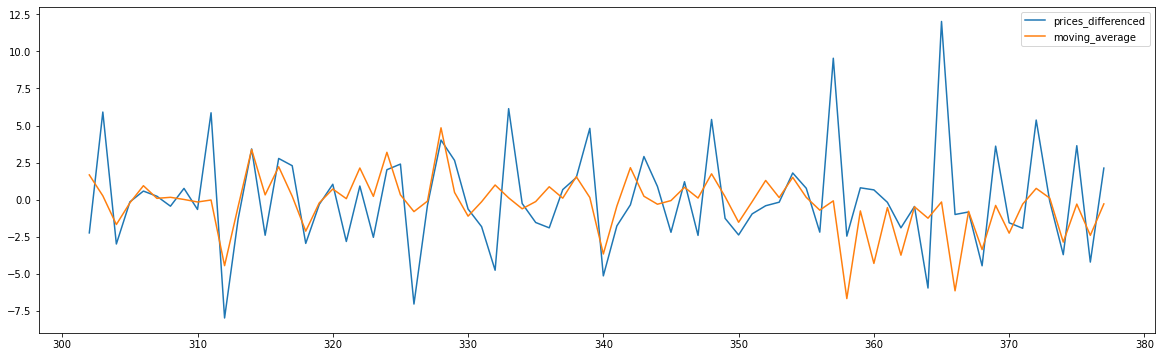

In [170]:
pred_df['prices_diff'].plot(label = 'prices_differenced',legend = True,figsize = (20,6))
#pred_df['pred_mean'].plot(label = 'mean',legend = True)
#pred_df['pred_last_value'].plot(label = 'last',legend = True)
pred_df['pred_MA'].plot(label = 'moving_average',legend = True)

In [157]:
from sklearn.metrics import mean_squared_error 
mse_mean = mean_squared_error(pred_df.prices_diff, pred_df.pred_mean) 
mse_last = mean_squared_error(pred_df.prices_diff, pred_df.pred_last_value)
mse_MA = mean_squared_error(pred_df.prices_diff, pred_df.pred_last_value)

In [163]:
mse_last

35.641087

<BarContainer object of 3 artists>

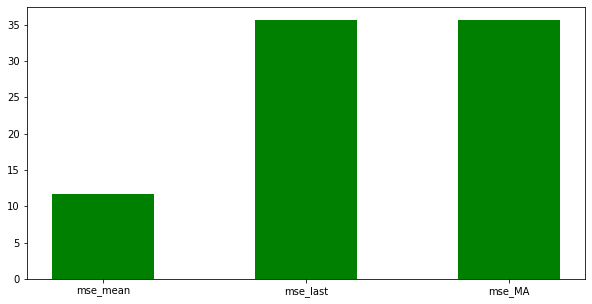

In [168]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['mse_mean','mse_last','mse_MA'],[mse_mean,mse_last,mse_MA],width = 0.5,color = 'green')

#### Train - Test split

In [39]:
size = int(len(ts) * 0.8)

In [40]:
ts_train = ts.iloc[:size]

In [41]:
ts_test = ts.iloc[size:]

In [42]:
ts_train.tail()

Date
2007-11-01     9.360000
2007-12-01    10.210000
2008-01-01     6.040000
2008-02-01    13.190001
2008-03-01    12.430000
Freq: MS, Name: price, dtype: float32

In [43]:
ts_test.head()

Date
2008-04-01     9.200000
2008-05-01     4.130000
2008-06-01    17.280001
2008-07-01     9.100000
2008-08-01     5.660000
Freq: MS, Name: price, dtype: float32

#### Building ARIMA model

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model = ARIMA(ts_train,order = (1,1,1)).fit()

#### prediction

In [49]:
len(ts_train)

242

In [50]:
pred = model.predict(start = len(ts_train),end = (len(ts)-1))

In [51]:
pred.head()

2008-04-01   -2.711982
2008-05-01   -0.276567
2008-06-01   -0.012353
2008-07-01    0.016312
2008-08-01    0.019421
Freq: MS, dtype: float64

#### Model evaluation

In [52]:
from sklearn.metrics import mean_squared_error

In [55]:
err = np.sqrt(mean_squared_error(ts_test,pred))
err

11.076767913791272

<AxesSubplot:xlabel='Date'>

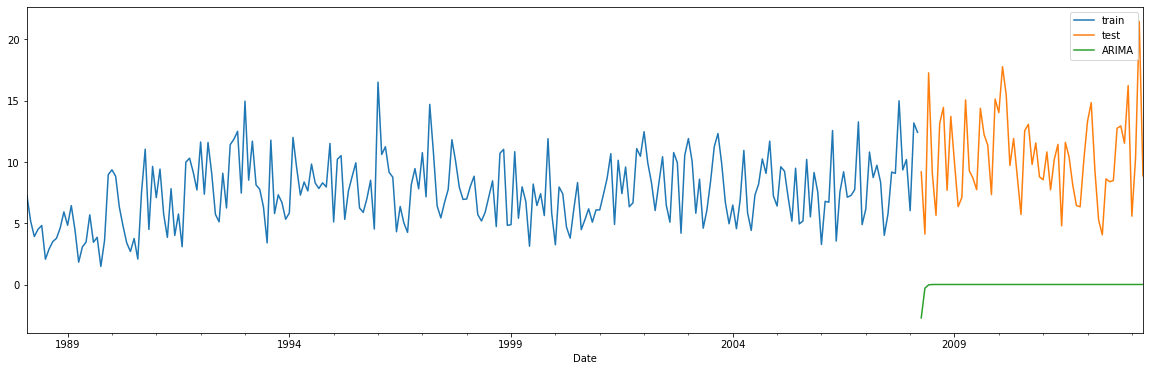

In [56]:
ts_train.plot(label = 'train',legend = True,figsize = (20,6))
ts_test.plot(label = 'test',legend = True)
pred.plot(label = 'ARIMA',legend = True)